# The Titanic

* https://www.youtube.com/watch?v=ZPy-wg6ykJ0

### The Crystal Palace

The Great Exhibition of 1851

https://en.wikipedia.org/wiki/The_Crystal_Palace

### The Titanic - The Crystal Palace of the Sea

https://www.reddit.com/r/titanic/comments/mp1t32/this_is_one_of_my_favorite_shots_of_the_titanic/

### Ship Comparisons

https://www.hmy.com/timeline-worlds-largest-passenger-ships/

### Sources

On that fatal night in 1912, the world’s largest moving object disappeared beneath the waters of the North Atlantic in less than three hours. Why was the ship sailing through waters well known to be a "mass of floating ice"? Why were there too few lifeboats? Why were a third of the survivors crew members? Based on the sensational evidence of the U.S. Senate hearings, eyewitness accounts, and the results of the 1985 Woods Hole expedition that photographed the ship, this electrifying account vividly re-creates the vessel’s last desperate hours afloat and fully addresses the questions that have continued to haunt the tragedy of the Titanic.

**The Titanic: Disaster of the Century** by Wyn Craig Wade

Everyone from suffragists to their opponents; radicals, reformers, and capitalists; critics of technology and modern life; racists and xenophobes and champions of racial and ethnic equality; editorial writers and folk singers, preachers and poets found moral and cultural lessons in the sinking of the Titanic.

In a new edition that both commemorates the one hundredth anniversary of the disaster and elaborates, in a revised afterword, on the ship's continued impact on the public imagination (evidenced by the Titanic mania evoked by James Cameron's 1997 film), Steven Biel explores the Titanic in all its complexity and contradictions.

**Down with the Old Canoe: A Cultural History of the Titanic Disaster** by Steven Biel (Author)

Online Sources
* https://www.encyclopedia-titanica.org/
* https://www.encyclopedia-titanica.org/class-gender-titanic-disaster-1912~chapter-2~part-2.html

### Early 1900s

* Ultranationalism
* Race Problem
* Equal Rights Problem
* Labor Problem
* Immigration Problem
* Rumors of War
* Spanish Flu

In [ ]:
# get the data
import pandas as pd

titanic = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/Datasets/main/titanic.csv', index_col='Unnamed: 0')
print(titanic.shape)
print(titanic.head())
print(titanic.info())

(891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     89

## Data Prep

In [ ]:
# look at our titanic datatypes
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 99.2+ KB


In [ ]:
# delete titanic features where the majority of values (75%+) are missing
titanic.drop(['deck'], axis=1, inplace=True)

In [ ]:
# check for constant features reminder

constant_features = [
    feat for feat in titanic.columns if len(titanic[feat].unique()) == 1
]

constant_features

[]

In [ ]:
# check for low variance features
few_features = [
    feat for feat in titanic.columns if len(titanic[feat].fillna(0).unique()) == 1
]

few_features

[]

In [ ]:
# check for duplications
duplicated_feat = []
for i in range(0, len(titanic.columns)):
    orig = titanic.columns[i]

    for dupe in titanic.columns[i + 1:]:
        if titanic[orig].equals(titanic[dupe]):
            duplicated_feat.append(dupe)

duplicated_feat

[]

In [ ]:
# check for quasi constant and bi-label features
for feat in titanic.columns.sort_values():
    if (len(titanic[feat].unique()) < 3):
        print(titanic[feat].value_counts())

True     537
False    354
Name: adult_male, dtype: int64
no     549
yes    342
Name: alive, dtype: int64
True     537
False    354
Name: alone, dtype: int64
male      577
female    314
Name: sex, dtype: int64
0    549
1    342
Name: survived, dtype: int64


In [ ]:
# split the titanic data into train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                titanic.drop(['survived'], axis=1),
                                titanic['survived'],
                                test_size=0.25,
                                random_state=42)

print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))
print(X_train.head())

(668, 13)
668
(223, 13)
223
     pclass     sex    age  sibsp  parch      fare embarked   class    who  \
298       1    male    NaN      0      0   30.5000        S   First    man   
884       3    male  25.00      0      0    7.0500        S   Third    man   
247       2  female  24.00      0      2   14.5000        S  Second  woman   
478       3    male  22.00      0      0    7.5208        S   Third    man   
305       1    male   0.92      1      2  151.5500        S   First  child   

     adult_male  embark_town alive  alone  
298        True  Southampton   yes   True  
884        True  Southampton    no   True  
247       False  Southampton   yes  False  
478        True  Southampton    no   True  
305       False  Southampton   yes  False  


In [ ]:
# all of our features need to eventually have numerical values so let's map bi-label features to 1s and 0s

X_train[['adult_male', 'alone']] = X_train[['adult_male', 'alone']].astype(int)
X_test[['adult_male', 'alone']] = X_test[['adult_male', 'alone']].astype(int)
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
298,1,male,NaN,0,0,30.5000,S,First,man,1,Southampton,yes,1
884,3,male,25.00,0,0,7.0500,S,Third,man,1,Southampton,no,1
247,2,female,24.00,0,2,14.5000,S,Second,woman,0,Southampton,yes,0
478,3,male,22.00,0,0,7.5208,S,Third,man,1,Southampton,no,1
305,1,male,0.92,1,2,151.5500,S,First,child,0,Southampton,yes,0


In [ ]:
# turn yes and no titanic features to 1 and 0
X_train['alive'] = X_train['alive'].map({'yes':1,'no':0})
X_test['alive'] = X_test['alive'].map({'yes':1,'no':0})

In [ ]:
# turn male and female titanic features to 1 and 0
X_train['sex'] = X_train['sex'].map({'female':1,'male':0})
X_test['sex'] = X_test['sex'].map({'female':1,'male':0})
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
298,1,0,NaN,0,0,30.5000,S,First,man,1,Southampton,1,1
884,3,0,25.00,0,0,7.0500,S,Third,man,1,Southampton,0,1
247,2,1,24.00,0,2,14.5000,S,Second,woman,0,Southampton,1,0
478,3,0,22.00,0,0,7.5208,S,Third,man,1,Southampton,0,1
305,1,0,0.92,1,2,151.5500,S,First,child,0,Southampton,1,0


In [ ]:
# let's look at our value counts for our categorical features
for feat in X_train.select_dtypes(include='object').columns:
    print(X_train[feat].value_counts())

S    491
C    117
Q     58
Name: embarked, dtype: int64
Third     375
First     152
Second    141
Name: class, dtype: int64
man      405
woman    198
child     65
Name: who, dtype: int64
Southampton    491
Cherbourg      117
Queenstown      58
Name: embark_town, dtype: int64


In [ ]:
# embark_town is equal to embarked so let's drop embarked
X_train.drop(['embarked'], axis=1, inplace=True)
X_test.drop(['embarked'], axis=1, inplace=True)

Let's fix the embark_town, missing data by imputing the most used values that are missing. We should be careful deleting rows because if we delete rows in our X training set we need to delete the same rows in our y training set. We can do this by capturing the index of the rows we are deleting if it is necessary to delete rows.

In [ ]:
# impute the embark missing rows, drop deck, and alive
print(f'Most common value used for embark_town: {X_train["embark_town"].mode()[0]}')
X_train['embark_town'].fillna(X_train['embark_town'].mode()[0], inplace=True)
X_test['embark_town'].fillna(X_test['embark_town'].mode()[0], inplace=True)

print(X_train.info())

Most common value used for embark_town: Southampton
<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       668 non-null    int64  
 1   sex          668 non-null    int64  
 2   age          536 non-null    float64
 3   sibsp        668 non-null    int64  
 4   parch        668 non-null    int64  
 5   fare         668 non-null    float64
 6   class        668 non-null    object 
 7   who          668 non-null    object 
 8   adult_male   668 non-null    int32  
 9   embark_town  668 non-null    object 
 10  alive        668 non-null    int64  
 11  alone        668 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 62.6+ KB
None


In [ ]:
# check for missing data in the Titanic training set
X_train.isnull().sum()

pclass           0
sex              0
age            132
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

In [ ]:
# use the technique we used in assignment 3 to replace missing values for age
missing_age = X_train[X_train.age.isnull()]
missing_age.shape

(132, 12)

In [ ]:
# it looks missing age is all adult male
missing_age.adult_male.value_counts()

1    96
0    36
Name: adult_male, dtype: int64

In [ ]:
# so all of our missing age data are adult males, how do adult males look in the whole titanic dataset?
print(X_train.adult_male.value_counts())
print(X_train.adult_male.unique()) # what are the values being used?

1    405
0    263
Name: adult_male, dtype: int64
[1 0]


In [ ]:
# seems there are enough adult males to get an average
average_age = X_train.dropna(how='any', subset=['age']) # drop rows where the age is missing
average_age.groupby('adult_male')['age'].mean() # get the mean of age based on adult_male

adult_male
0    24.305463
1    33.179612
Name: age, dtype: float64

In [ ]:
# we see that the average age for adult males is about 33 so let's impute that value on our missing ages
X_train.age.fillna(33, inplace=True) # inplace makes the change permanent
X_test.age.fillna(33, inplace=True)

# did we get all the missing values?
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       668 non-null    int64  
 1   sex          668 non-null    int64  
 2   age          668 non-null    float64
 3   sibsp        668 non-null    int64  
 4   parch        668 non-null    int64  
 5   fare         668 non-null    float64
 6   class        668 non-null    object 
 7   who          668 non-null    object 
 8   adult_male   668 non-null    int32  
 9   embark_town  668 non-null    object 
 10  alive        668 non-null    int64  
 11  alone        668 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 62.6+ KB


Looks like we've taken care of our missing age values. We will use the same value, 33, for our test data when the time comes.

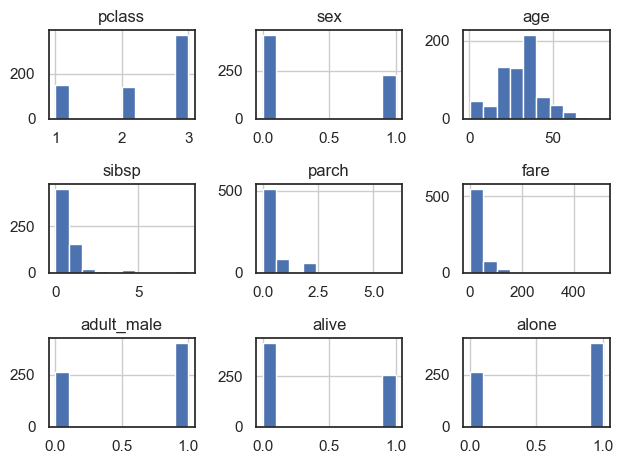

In [ ]:
import matplotlib.pyplot as plt

X_train.hist()
plt.tight_layout()

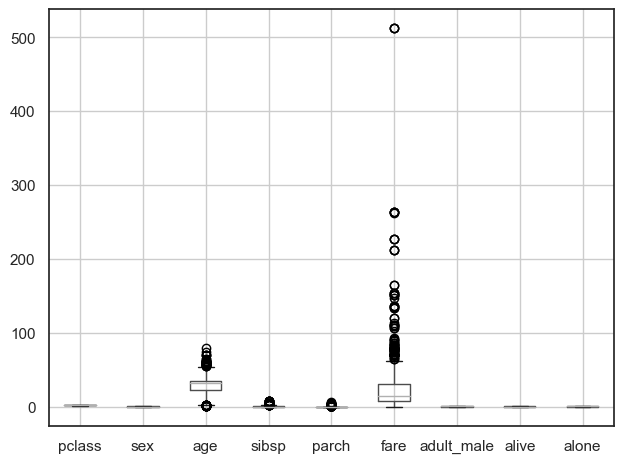

In [ ]:
X_train.boxplot()
plt.tight_layout()

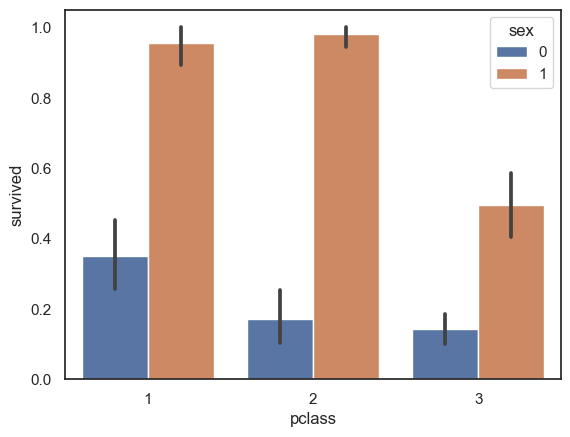

In [ ]:
# bar chart with 95% confidence intervals (error bars)
sns.barplot(x='pclass', y=y_train, hue='sex', data=X_train);

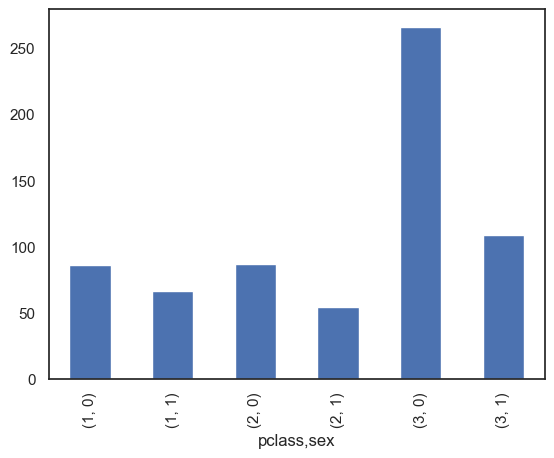

In [ ]:
# example of using groupby
X_train.groupby('pclass')['sex'].value_counts().plot(kind='bar');

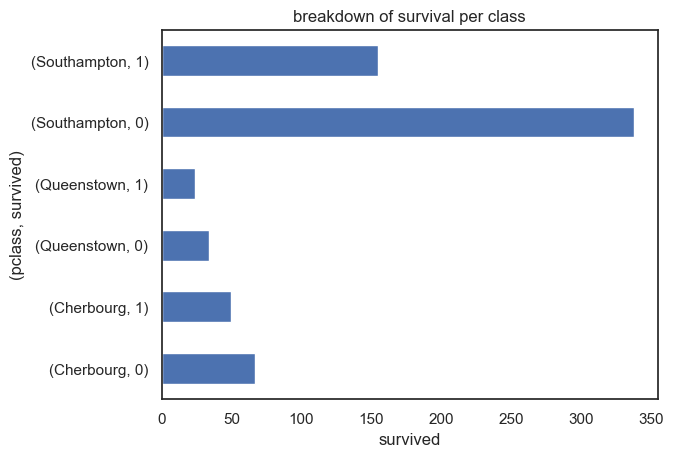

In [ ]:
X_train.groupby('embark_town')['sex'].value_counts().plot.barh()
plt.xlabel('survived')
plt.ylabel('(pclass, survived)')
plt.title('breakdown of survival per class')
plt.show()

In [ ]:
# groupby data views
titanic.groupby(['pclass', 'embark_town']).size()

pclass  embark_town
1       Cherbourg       85
        Queenstown       2
        Southampton    127
2       Cherbourg       17
        Queenstown       3
        Southampton    164
3       Cherbourg       66
        Queenstown      72
        Southampton    353
dtype: int64

In [ ]:
# using aggregates
titanic.groupby('sex')['fare'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
sex,,,,
female,6.75,512.3292,44.479818,23.0
male,0.00,512.3292,25.523893,10.5


In [ ]:
# correlation check
X_train.corr()

In [ ]:
# the heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')

# compute the correlation matrix
corr = X_train.corr(method='pearson')

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,10))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True);

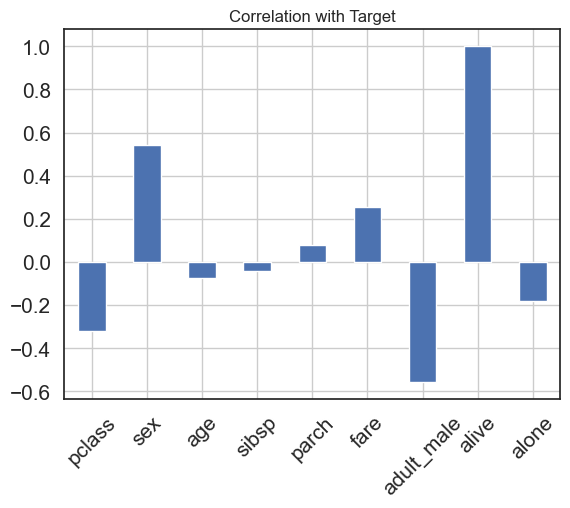

In [ ]:
# Now that all of our numerical data are in place let's do some correlation anlaysis against our titanic target (survived)
X_train._get_numeric_data().corrwith(y_train).plot.bar(
        title = "Correlation with Target", fontsize = 15,
        rot = 45, grid = True);

In [ ]:
# looks like the alive feature is 100% positively correlated with the target survive. Makes sense. Let's get rid of it.
X_train.drop(['alive'], axis=1, inplace=True)
X_test.drop(['alive'], axis=1, inplace=True)

Text(0, 0.5, 'Mutual Information')

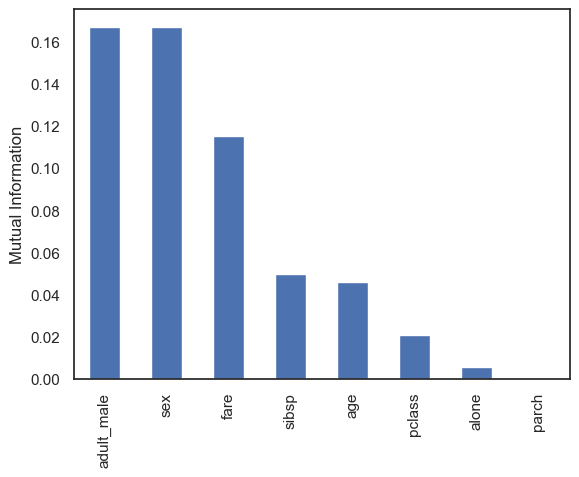

In [ ]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X_train._get_numeric_data(), y_train)
mi = pd.Series(mi)
mi.index = X_train._get_numeric_data().columns
mi.sort_values(ascending=False).plot.bar()
plt.ylabel('Mutual Information')

* sibsp Number of Siblings/Spouses Aboard
* parch Number of Parents/Children Aboard

In [ ]:
X_train.shape, X_test.shape

((668, 11), (223, 11))

## Feature Engineering

In [ ]:
# use sklearn one hot encoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories='auto', drop='first', sparse=False)

cat_features = ['embark_town', 'class', 'who']
ohe_train = ohe.fit_transform(X_train[cat_features])
ohe_train = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out(cat_features))
ohe_train.index = X_train.index
# use this line if you get an error
# X_train = pd.DataFrame(ohe_train, columns=ohe.get_feature_names(cat_features))
X_train = X_train.join(ohe_train)
X_train.drop(['embark_town', 'class', 'who'], axis=1, inplace=True)

ohe_test = ohe.transform(X_test[cat_features])
ohe_test = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out(cat_features))
ohe_test.index = X_test.index
X_test = X_test.join(ohe_test)
X_test.drop(['embark_town', 'class', 'who'], axis=1, inplace=True)

print(X_train.shape)
print(X_train.head())

(668, 14)
     pclass  sex    age  sibsp  parch      fare  adult_male  alone  \
298       1    0  33.00      0      0   30.5000           1      1   
884       3    0  25.00      0      0    7.0500           1      1   
247       2    1  24.00      0      2   14.5000           0      0   
478       3    0  22.00      0      0    7.5208           1      1   
305       1    0   0.92      1      2  151.5500           0      0   

     embark_town_Queenstown  embark_town_Southampton  class_Second  \
298                     0.0                      1.0           0.0   
884                     0.0                      1.0           0.0   
247                     0.0                      1.0           1.0   
478                     0.0                      1.0           0.0   
305                     0.0                      1.0           0.0   

     class_Third  who_man  who_woman  
298          0.0      1.0        0.0  
884          1.0      1.0        0.0  
247          0.0      0.0      

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pclass                   668 non-null    int64  
 1   sex                      668 non-null    int64  
 2   age                      668 non-null    float64
 3   sibsp                    668 non-null    int64  
 4   parch                    668 non-null    int64  
 5   fare                     668 non-null    float64
 6   adult_male               668 non-null    int32  
 7   alone                    668 non-null    int32  
 8   embark_town_Queenstown   668 non-null    float64
 9   embark_town_Southampton  668 non-null    float64
 10  class_Second             668 non-null    float64
 11  class_Third              668 non-null    float64
 12  who_man                  668 non-null    float64
 13  who_woman                668 non-null    float64
dtypes: float64(8), int32(2),

## Feature Selection

### Check for Balanced Dataset

0    415
1    253
Name: survived, dtype: int64


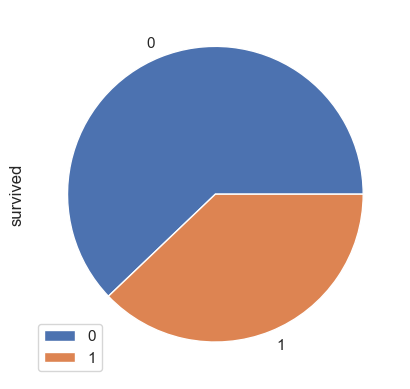

In [ ]:
# see if the titanic survived (target) is balanced
print(y_train.value_counts())
y_train.value_counts().plot.pie(labels=['0', '1']).legend()

### Build the Model

In [ ]:
# we can now build our titanic regression model
# is it balanced? no, use class_weight='balanced'
# is it a small dataset? yes, use liblinear for solver
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

model = LogisticRegression(class_weight='balanced', solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

rocauc_score = roc_auc_score(y_test, predictions)

print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Test Score: {model.score(X_test, y_test)}')
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

# what is our accuracy? (tn + tp / (total length of our data))
print(f'Test Accuracy (tn + tp / (total length of our data)): {(tn + tp) / (tn + fp + fn + tp)}')
print(f'Roc-Auc Score: {rocauc_score}')

print()
print(confusion_matrix(y_test, predictions))
print()

Training Score: 0.8263473053892215
Test Score: 0.8071748878923767
Test Accuracy (tn + tp / (total length of our data)): 0.8071748878923767
Roc-Auc Score: 0.7961596511822908

[[114  20]
 [ 23  66]]



### The Classification Report for Imbalanced Data Sets

Both the titanic and cancer datasets weren't as balanced as they could be but to appreciate the implications of an imbalanced dataset, consider a fraudualent credit card dataset where there may be a 1 (for fraudulent activity) per 1000 0s of normal activity. We wouldn't need to build a predictive model to make correct predictions 99% of the time. The data itself lets us do that. We need metrics that tell us that the model we build is learning about the relevant data and that it predicts what it is suppose to predict. This gets back to our Precision Recall Tradeoff.

**Precision**: The sum of observations correctly classified as positive out of the total observations classified as positive. From the formula, tp / (tp + fp), we can see we want to mimimize fp (false positives), or type I errors, which is sounding an alarm when there is no fire.

**Recall**: The sum of observations correctly classified as positive out of the total actual positives. From the forumula, tp / (tp + fn), we can see we want to minimize fn (false negatives), or type II errors, which is not sounding an alarm when there is a fire.

In [ ]:
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[114  20]
 [ 23  66]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       134
           1       0.77      0.74      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



* precision 0: 114 / 137
* precision 1: 66 / 86
* recall 0: 114 / 134
* recall 1: 66 / 89

We know about accuracy, precision, and recall and we've talked about f1-score as being the harmonic mean of precision and recall (f1 score = 2 * (precision * recall) / (precision + recall)).

* support: the number of observations labeled 0 or 1 (remember the pie chart we made of the target?)
* macro avg: the average between the two classes (e.g. (prec 0 + prec 1) / 2
* weighted avg: the average between the two classes taking into account the number of their observations (e.g. ((prec0 * score0) + (prec 1 * score1)) / total)

A classification report provides a little more information by providing metrics for each class. For example, for class 0, our recall is higher than our precision, which tells us that there are fewer false negatives than false positives in class 0.

In [ ]:
import numpy as np

print((.83 + .77) / 2)
wgt_exmpl = ((.83 * 134) + (.77 * 89)) / (134 + 89)
print(np.round(wgt_exmpl, 2))

0.8
0.81


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print('Confusion Matrix')
print()
print(f'''
           survived predicted
                   |  0   |  1
           -----------------------
           no      | {tn}  |  {fp}
  actual   -----------------------
           yes     | {fn}   |  {tp}

''')

Confusion Matrix


           survived predicted
                   |  0   |  1     
           -----------------------  
           no      | 114  |  20   
  actual   -----------------------  
           yes     | 23   |  66 




### Metrics

* tn = pred 0 actual 0
* fp = pred 1 actual 0
* fn = pred 0 actual 1
* tp = pred 1 actual 1
* acc(uracy) = $\frac{tn + tp}{total}$
* error = $\frac{fp + fn}{total}$
* prev(alence) = $\frac{fn + tp}{total}$
* queue = $\frac{fp + tp}{total}$
* tpr = $\frac{tp}{tp + fn}$
    * true positive rate
    * sensitivity
    * prob of detection
    * 1 - fnr
* fnr = $\frac{fn}{tp + fn}$
    * false negative rate
    * type II error
    * 1 - tpr
* tnr = $\frac{tn}{tn + fp}$
    * true negative rate
    * specificity
    * 1 - fpr
* fpr = $\frac{fp}{tn + fp}$
    * false positive rate
    * type I error
    * fall out
    * prob of false claim
    * 1 - tnr
* ppv = $\frac{tp}{tp + fp}$
    * positive predicted value
    * precision
    * 1 - fdr
* fdr = $\frac{fp}{tp + fp}$
    * false discovery rate
    * 1 - ppv
* npv = $\frac{tn}{tn + fn}$
    * negative predicted value
    * 1 - for
* for = $\frac{fn}{tn + fn}$
    * false omission rate
    * 1 - npv
* liklihood ratio+ (lr+) = $\frac{tpr}{fpr}$
    * roc
* liklihood ratio- (lr-) = $\frac{fnr}{tnr}$
* diagnostic odds ratio = $\frac{lr+}{lr-}$
* f1 score = 2 * $\frac{precision-recall}{precision+recall}$
* Youden's J = sensitivity + specificity - 1 = tpr - fpr
* Matthew's Correlation Coefficient = $\frac{(tp*tn)-(fp*tp)}{\sqrt{(tp+fp)(tp+fn)(tn+fp)(tn+fn)}}$
    
